Reload configuration
-----------
First reload everything as per "Activity 2. RegressionBasic.ipynb".  True function, *etc.*, redefined here as well.

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pl
import sys
import os
sys.path.append(os.getcwd())
import regressiondemo as rd

##############################
#      Customize the demo here
#      =======================
# the "true" function of x with range fixed at [0,10]
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  when fitting goes wild, need to constrain what y's are plotted
#  must be compatible with "true" function
ydisplaymin = -1.8
ydisplaymax = 1.8

#  don't make points more than 100 as demo is O(points^3)
points = 30

#  noise level (std.dev)
rd.setSigma(0.2)
##############################

x = rd.makeX(points)
#  build the true values matching the sampled data

y = rd.addNoise(truefunc(x))

# xts and yts store the "true" function for the purposes of plotting
# these have to be high frequency to make the resultant plot look
# like a smooth curve
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

## Step 2.1:  Fitting different orders of polynomials
Now we will try regression this for a whole range of orders, different degrees of the polynomial.  This means generating a set of *orders*.  We do this by starting with a maximum order given by a bit less than *points* and then halve until the order shrinks to 3.  Now we repeat the above code for the different orders.

Text(0.5, 0.98, 'Fits for orders = 3, 6, 12, 25')

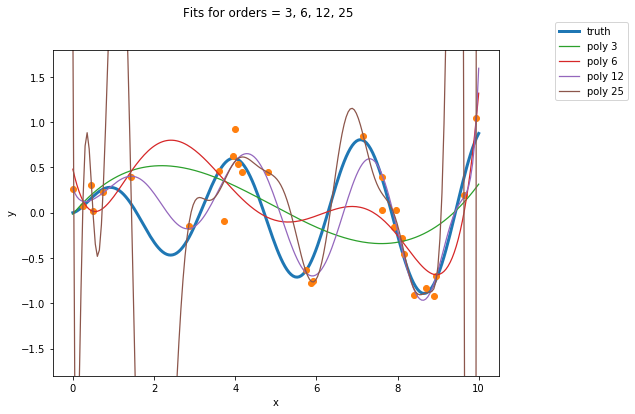

In [2]:
# make canvas size a bit bigger (in inches)
bigcanvas = [8,6]
pl.figure(figsize=bigcanvas)

# plot data and the truth
pl.plot(xts, yts,label = 'truth', linewidth=3.0) # default is green line? 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build a set of polynomial orders to use to fit
orders = rd.makeOrders(points)
#  print 'Fitting polynomials of orders = ', orders
        
for order in orders:
    #  build the fitted poly curve 
    ys = rd.linReg(x,y,xts,order)

    #  plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth=1.25 )  
    
#  the y range for the plot has to be altered depending on the data
pl.ylim(ydisplaymin,ydisplaymax)

# move the legend out of the way
# the (1.2, 1.2) starts the legend at the location relative to
# the top right corner
pl.legend(bbox_to_anchor=(1.3, 1.1))
pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

So, what do you see above with the different dimensional polynomials?  How well do higher dimensional polynomials work? Which order seems to give the best fit?  The low order polynomial is way too simple and the high order polynomial, with almost as much coefficients as data, goes wild.

## Step 2.2:  How well can linear regression fit the "truth" anyway?
In order to understand how well any particular polynomial order can do, we can try generating a large number of points with little noise and see how well a polynomial of that order fits the (near-enough to) "infinite" sample.   Note in practice we can rarely do this because we rarely have an infinite sample of data; nor do we know the "truth".  So this is a "what if" scenario used to test out what happens with models of different orders.

Fitting polynomials of orders =  [3, 6, 12, 25]


Text(0.5, 0.98, 'Best possible fits')

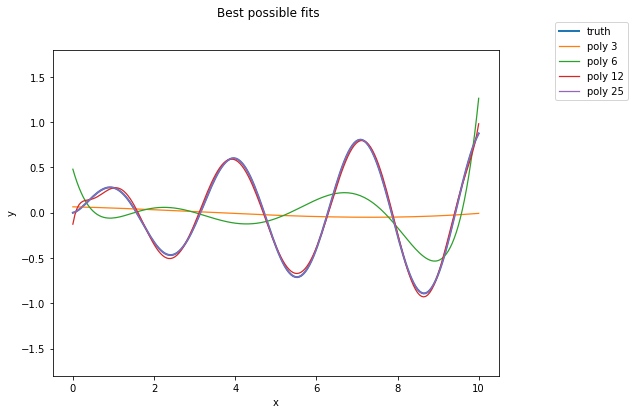

In [3]:
# plot the truth
pl.figure(figsize=bigcanvas)
pl.plot(xts, yts,label = 'truth', linewidth=2) # default is green line? 
pl.ylabel('y')
pl.xlabel('x')

print ("Fitting polynomials of orders = ", orders)
        
for order in orders:
    # fit the (approx) best polynomial
    ys = rd.bestLinReg(truefunc,xts,order)

    #  plot fitted curve
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
    
#  the y range for the plot has to be altered depending on the data
pl.ylim(ydisplaymin,ydisplaymax)

# move the legend out of the way
# the (1.2, 1.2) starts the legend at the location relative to
# the top right corner
pl.legend(bbox_to_anchor=(1.3, 1.1))
pl.suptitle('Best possible fits')

So these curves represent the (near) best fits one can do to the "truth" with different orders of polynomials.  These best fits are in the sense of "least squares", the least squared error averaged over the $x$-range.  When fitting to finite samples, one will get more or less close to these best fits, the less data one has then generally the worse the fit will be.

So you should see that the higher orders of polynomial the best fit matches the true function.  There is an order of polynomial where the best possible fit becomes indistinguishable to the eye on these plots.  However, consider again  the "fits of different orders" plot.  For the higher orders, these fits (with a smallish amount of data) are not even close to the best possible fit.
